In [23]:
from vision_models_playground.predictors.yolo_predictor import YoloV1Predictor
from vision_models_playground.datasets.datasets import get_voc_detection_dataset_yolo, get_voc_detection_dataset_raw
from vision_models_playground.utility.load_models import load_best_model

model = load_best_model("../models/train/ResNetYoloV1/2023-07-06_14-37-23")
class_map = get_voc_detection_dataset_yolo(root='../data')[1].class_map
predictor = YoloV1Predictor(model, threshold=0.2, class_map=class_map)
voc_test = get_voc_detection_dataset_raw(root='../data')[1]

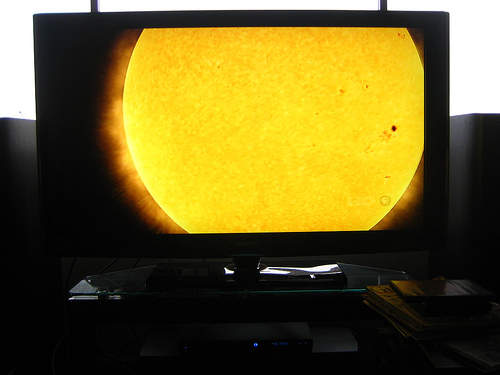

In [24]:
image = voc_test[0][0]
image

In [25]:
objects = predictor.predict(image)[0]
objects

[{'objects': [{'class_id': 19,
    'class_name': 'tvmonitor',
    'confidence': 0.20894171297550201,
    'x_min': 88,
    'y_min': 17,
    'x_max': 432,
    'y_max': 233,
    'already_occupied': 0.0,
    'area': 74304}],
  'image': <PIL.Image.Image image mode=RGB size=500x375>}]

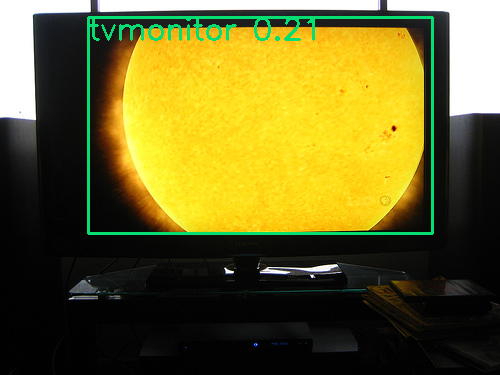

In [26]:
import PIL
import numpy as np
import cv2


def draw_objects(image, objects):
    image_edited = np.array(image)
    for obj in objects:
        # assign a random color
        color = hash(obj['class_name'])
        color = (color & 0xFF, (color >> 8) & 0xFF, (color >> 16) & 0xFF)

        x_min = obj['x_min']
        y_min = obj['y_min']
        x_max = obj['x_max']
        y_max = obj['y_max']
        name = obj['class_name']
        confidence = obj['confidence']

        display = f"{name} {confidence:.2f}"

        cv2.rectangle(image_edited, (x_min, y_min), (x_max, y_max), color, 2)
        cv2.putText(image_edited, display, (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)

    image_edited = PIL.Image.fromarray(image_edited)
    return image_edited

In [27]:
image_edited = draw_objects(image, objects)
image_edited

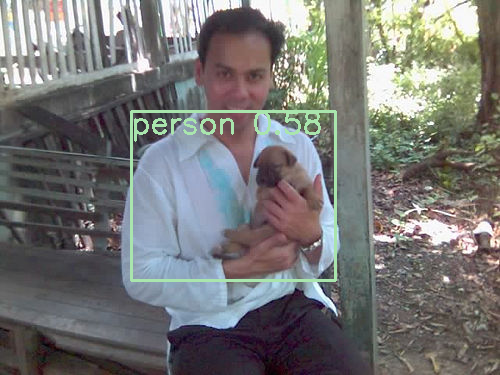

In [28]:
def detect_object(i, threshold):
    image = voc_test[i][0]
    predictor = YoloV1Predictor(model, threshold=threshold, class_map=class_map)
    objects = predictor.predict(image)[0]
    image_edited = draw_objects(image, objects)
    return image_edited

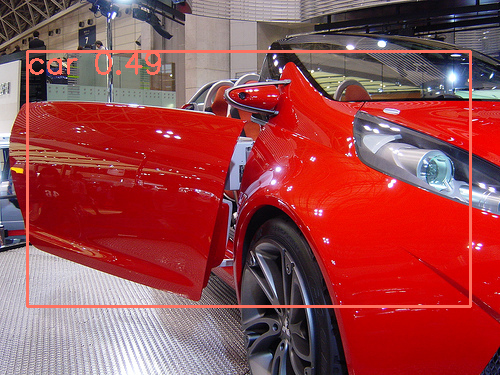

In [29]:
detect_object(5, 0.64)

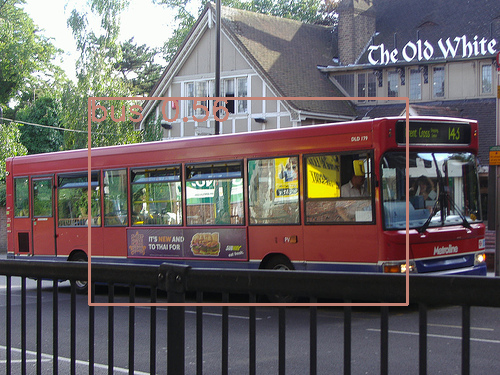

In [30]:
detect_object(6, 0.57)

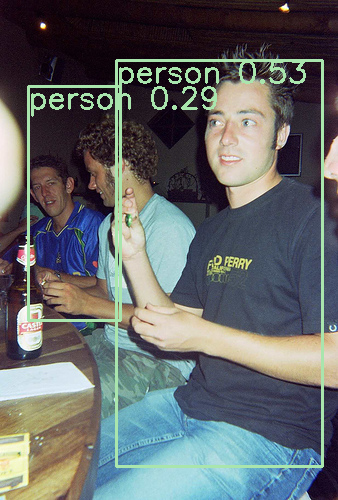

In [31]:
detect_object(7, 0.43)

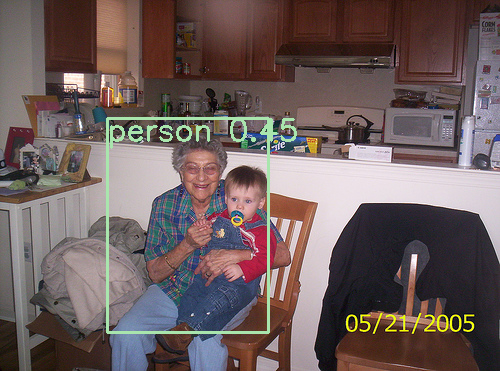

In [32]:
detect_object(8, 0.56)

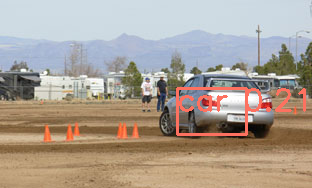

In [33]:
detect_object(9, 0.56)

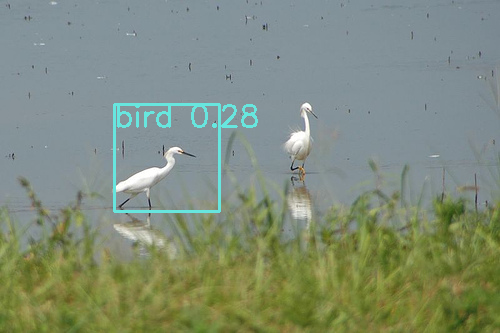

In [34]:
detect_object(13, 0.42)

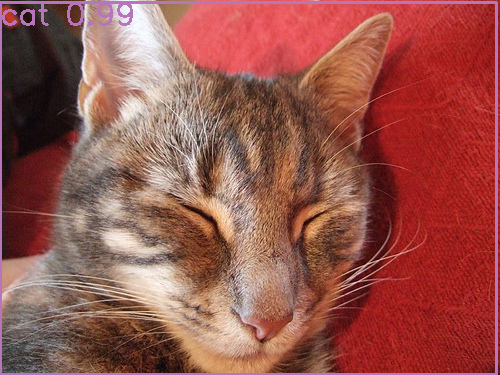

In [35]:
detect_object(14, 0.20)

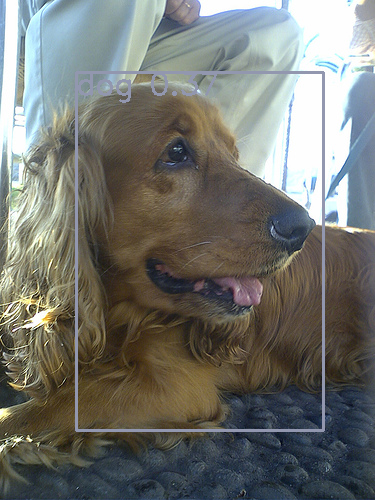

In [36]:
detect_object(15, 0.25)

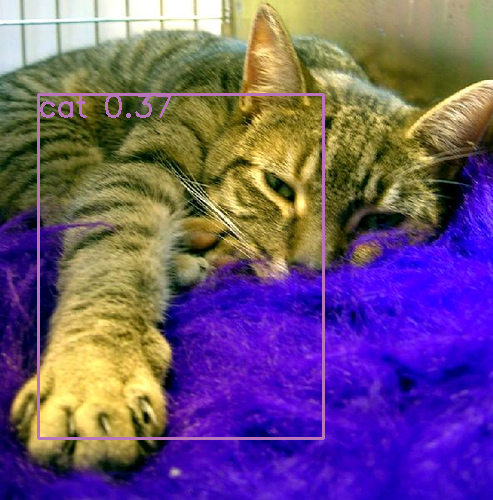

In [37]:
detect_object(16, 0.25)

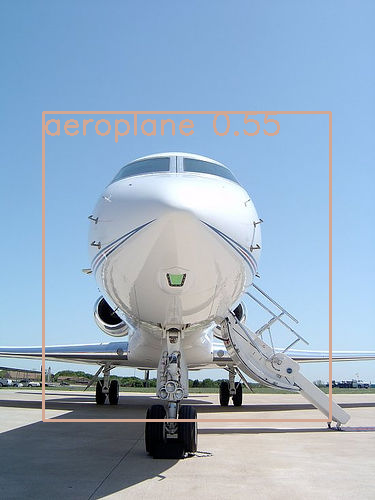

In [38]:
detect_object(17, 0.35)

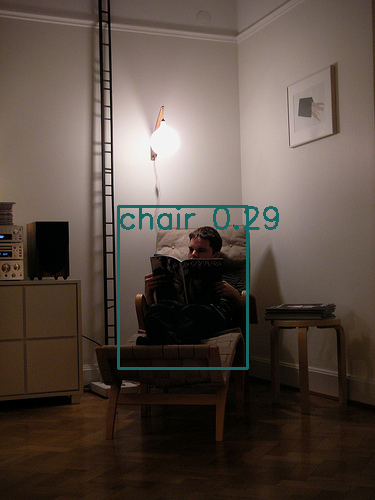

In [39]:
detect_object(18, 0.35)

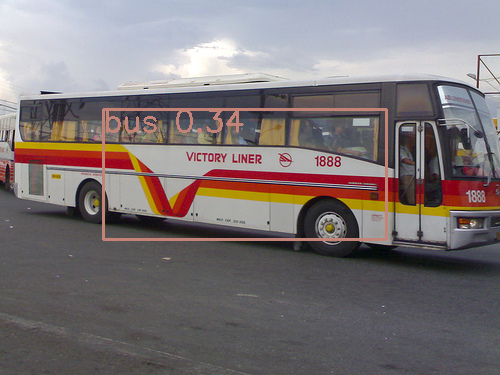

In [40]:
detect_object(19, 0.50)

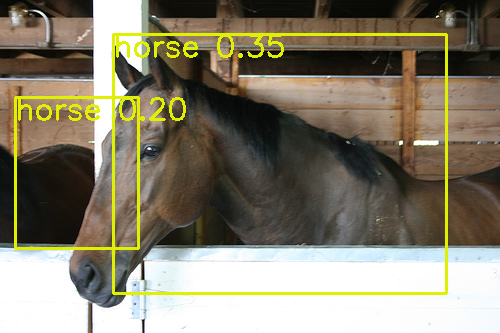

In [41]:
detect_object(20, 0.23)

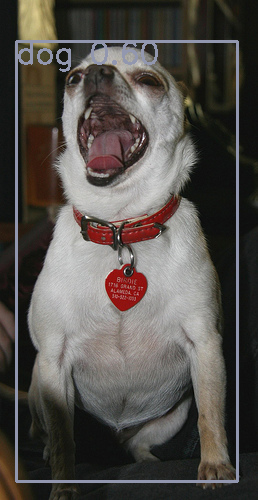

In [42]:
detect_object(22, 0.30)

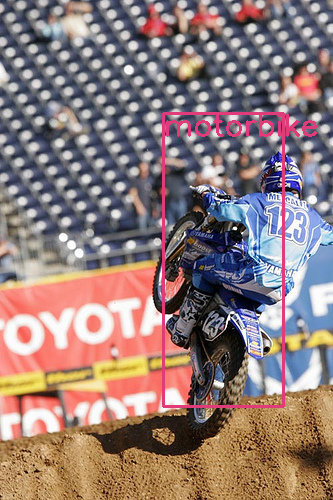

In [43]:
detect_object(23, 0.355)

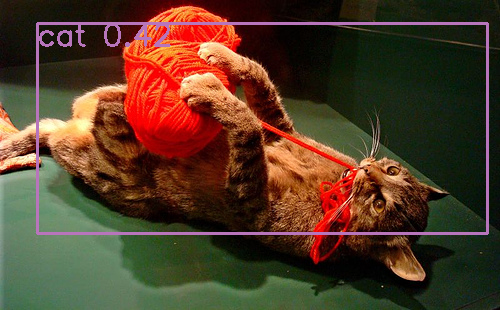

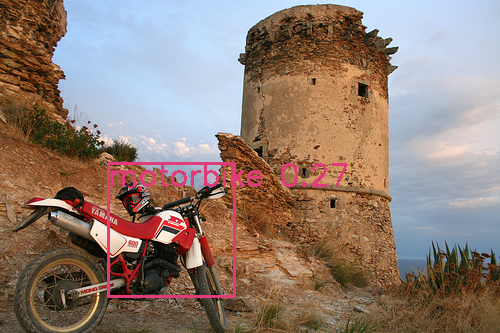